In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/%s'
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':16, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':16, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('sim_resolution', ['high', 'medium', 'low'], ['TNG100-1', 'TNG100-2', 'TNG100-3'])

ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.plotArgs('HI_fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('HI_fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('HI_fieldname', 'hisubhalo', {'color':'sandybrown'})
ds.plotArgs('fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('fieldname', 'hisubhalo', {'color':'sandybrown'})
ds.plotArgs('sim_resolution', 'medium', {'linestyle':'dashed'})
ds.plotArgs('sim_resolution', 'low', {'linestyle':'dotted'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# Simulation Resolution

The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


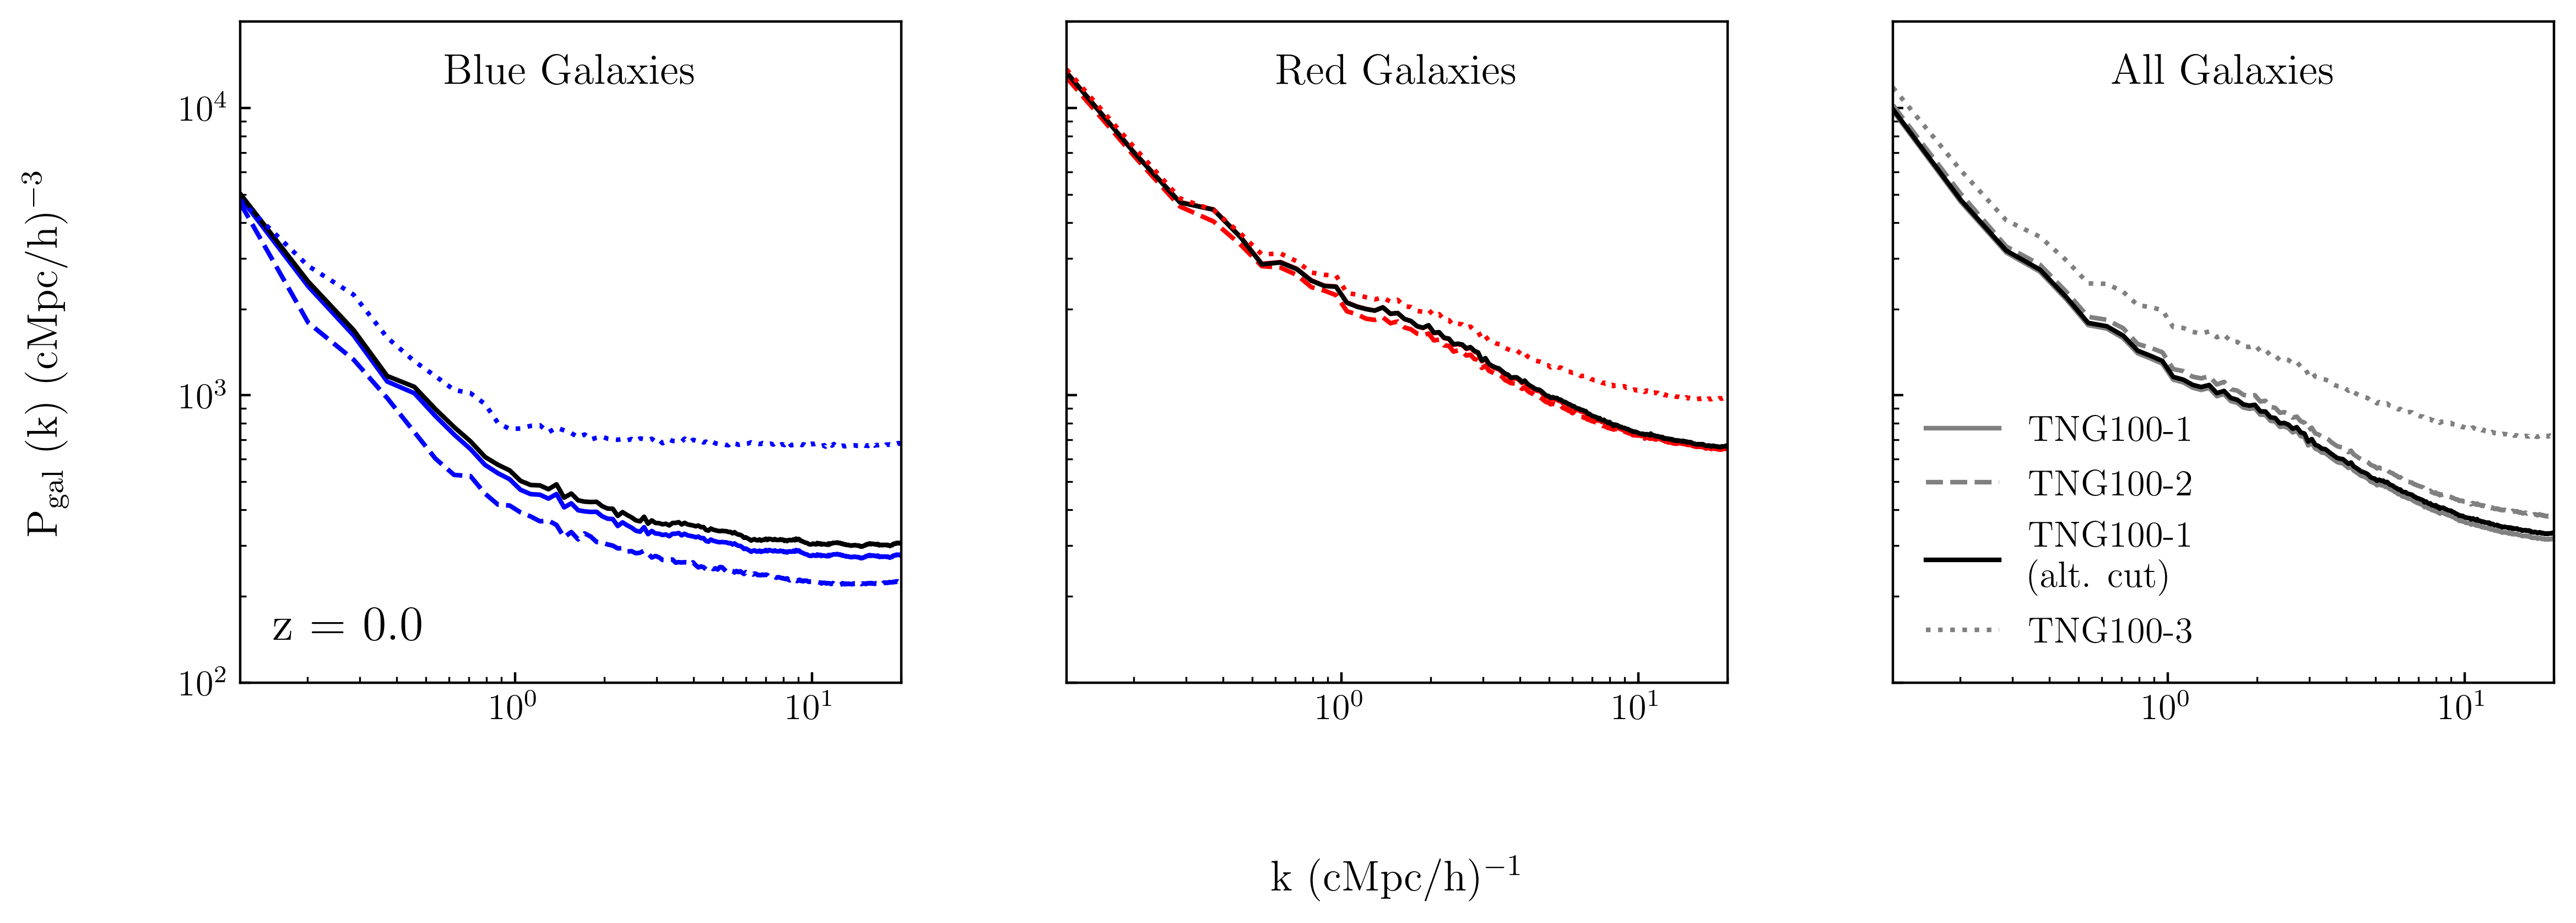

In [3]:
ip = {'is_auto':True, 'fieldname':'galaxy', 
      'axis':0, 'grid_resolution':800, 'color_cut':['0.60', 'None'], 
      'gal_res':['diemer', 'tng100-2'], 'snapshot':99,
      'gal_species':'stmass', 'sim_resolution':['low', 'medium', 'high'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'mas':'CICW',
     'censat':['no key found', 'both'], 'path':['fiducial', 'low-2', 'low-3', 'galbt']}

fg = ds.figrid('sim_resolution', 'snapshot', 'color', ip, figkw = {'dpi':400})
fg.colLabelArgs(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'], textKwargs = {'ha':'center', 'fontsize':14})
fg.plotArgs({'color':'blue'}, {'color':trgba('color', 'blue')})
fg.plotArgs({'color':'red'}, {'color':trgba('color', 'red')})
fg.plotArgs({'color':'resolved'}, {'color':'gray'})
fg.plotArgs({'gal_res':'tng100-2'}, {'color':'black', 'label':'TNG100-1\n(alt. cut)'})
fg.axisArgs({'ylim':[1e2, 2e4]})
fg.legendArgs({'loc':'lower left'}, (0,2))
fg.setDefaultTicksParams()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(YLAB%r"\rm{gal}", txtargs = {'fontsize':14})
fg.plot()
fg.save('sim_resolution_galaxy_auto_99.png')

The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


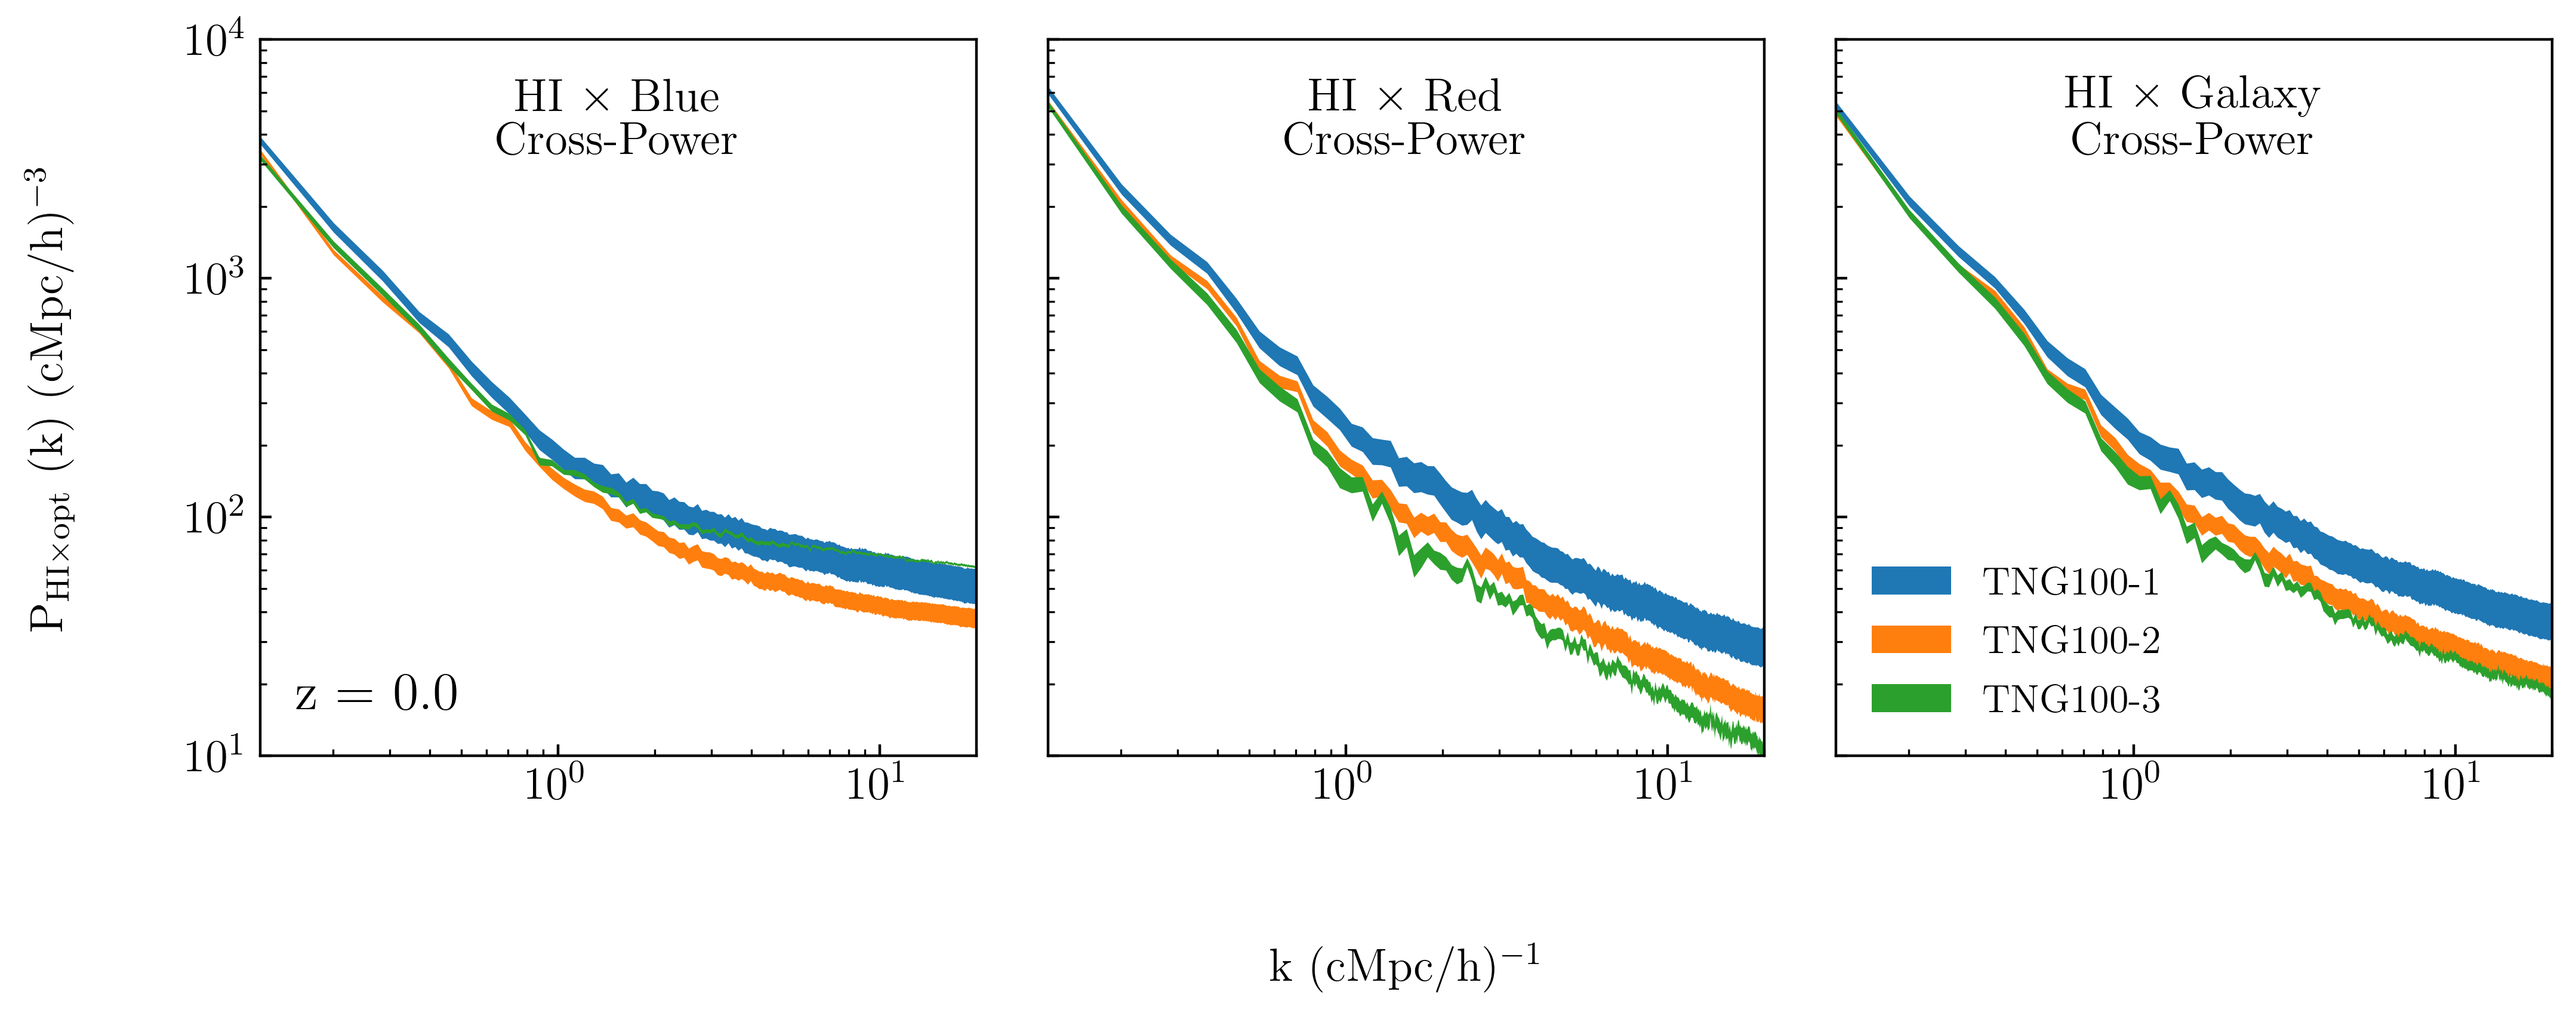

In [4]:
ip = {'is_auto':False, 'HI_fieldname':['hiptl', 'vn'], 
      'axis':0, 'grid_resolution':800, 'color_cut':['0.60', 'None'], 
      'gal_res':['diemer'], 'snapshot':99,
      'gal_species':'stmass', 'sim_resolution':['low', 'medium', 'high'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'mas':'CICW',
     'censat':['no key found', 'both'], 'path':['fiducial', 'low-2', 'low-3'],
     'post_process':'no key found'}

fg = ds.figrid('sim_resolution', 'snapshot', 'color', ip, figrid_args = {'wspace':0.1}, figkw = {'dpi':400})
fg.autoFill()
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(10, 1e4)})
fg.tickArgs({'labelsize':14})
fg.legendArgs({'loc':'lower left'}, (0,2))
fg.plot()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(YLAB%r"\mathrm{HI} \times \mathrm{opt}", txtargs = {'fontsize':14})
fg.save("sim_resolution_HIXgalaxy_99.png")
fg.save(DRAFTPATH%"sim_resolution_HIXgalaxy_99.png")

In [5]:
ip['color'] = 'blue'
# ip['space'] = 'redshift'
# ds.printMatching(ip)